In [1]:
#Importing the neccesary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
#Importing the data
data = pd.read_csv("medical_insurance.csv", sep=",")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# Preprocessing

In [3]:
#First look
print("Missing values :")
print(data.isna().sum(axis=0))
print()
print("Data types")
print(data.dtypes)
print()
print(data.describe())
for var in data.select_dtypes(include="object").columns.to_list():
    print()
    print(data[var].value_counts())

Missing values :
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data types
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010

sex
male      1406
female    1366
Name: count, dtype: int64

smoker
no     2208
yes     564
Name: count, dtype: int64

region
southeast    766
southwest    684
northwest    

# Analyse descriptive

C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


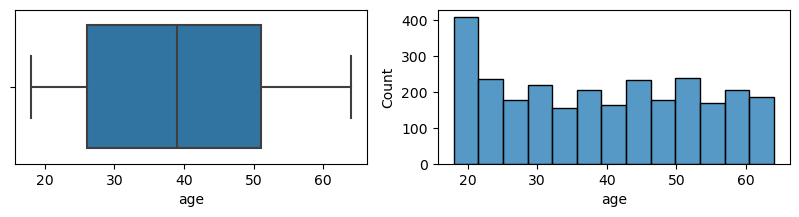

count    2772.000000
mean       39.109668
std        14.081459
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


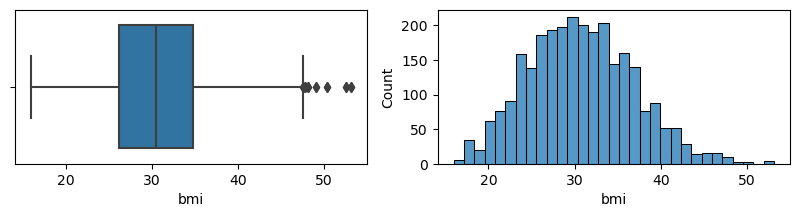

count    2772.000000
mean       30.701349
std         6.129449
min        15.960000
25%        26.220000
50%        30.447500
75%        34.770000
max        53.130000
Name: bmi, dtype: float64


C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


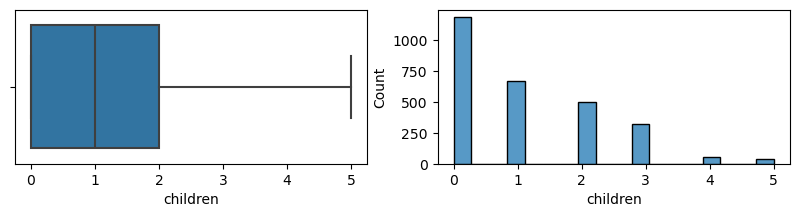

count    2772.000000
mean        1.101732
std         1.214806
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


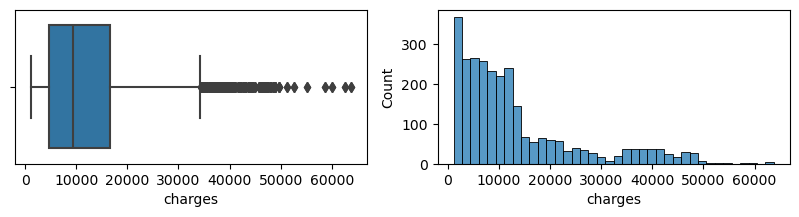

count     2772.000000
mean     13261.369959
std      12151.768945
min       1121.873900
25%       4687.797000
50%       9333.014350
75%      16577.779500
max      63770.428010
Name: charges, dtype: float64


C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maxpr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

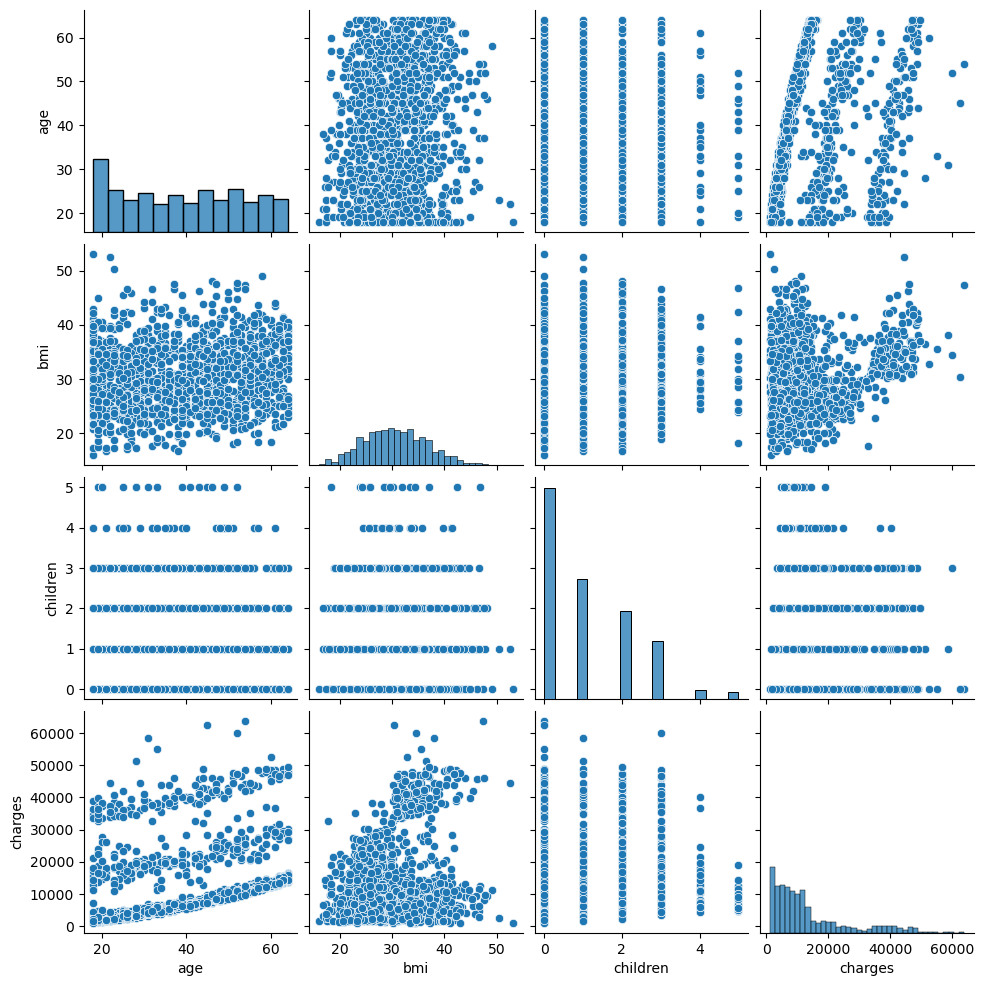

In [4]:
#Visualisation
for var in data.select_dtypes("number").columns:
    fig, axs = plt.subplots(1,2,figsize=(10,2))
    sns.boxplot(data, x = var, whis = 1.5, ax = axs[0])
    sns.histplot(data,x=var, ax = axs[1])
    plt.show()
    print(data[var].describe())

sns.pairplot(data)
plt.show()

[]

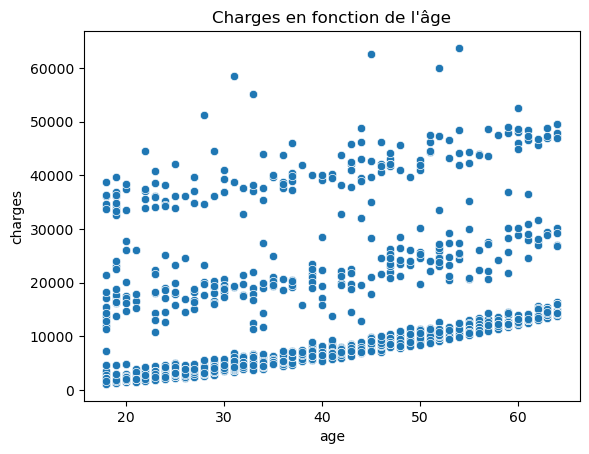

In [5]:
sns.scatterplot(data = data, y = "charges",x = "age")
plt.title("Charges en fonction de l'âge")
plt.plot()

On observe très clairement trois "traces" de points avec des charges clairement distinctes pour manifestement trois groupes d'individus.

[]

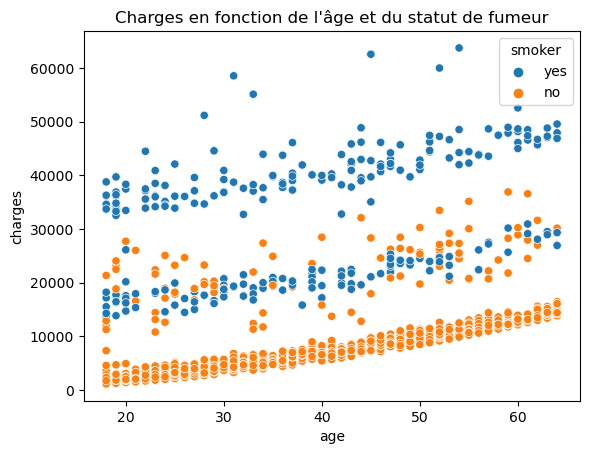

In [6]:
sns.scatterplot(data = data, y = "charges",x = "age",hue="smoker")
plt.title("Charges en fonction de l'âge et du statut de fumeur")
plt.plot()

Après plusieurs essais de coloration avec les variables catégorielles, on voit que le fait d'être fumeur influence clairement les charges de santé. \
Pour les "étages" 1 et 3, le phénomène est manifeste : être fumeur augmente les charges de santé (qui augmentent de toute façon avec l'âge).\
Cependant, pour l'étage 2, cela semble plus mitigé. Il faut donc explorer plus pour déterminer cet autre facteur.

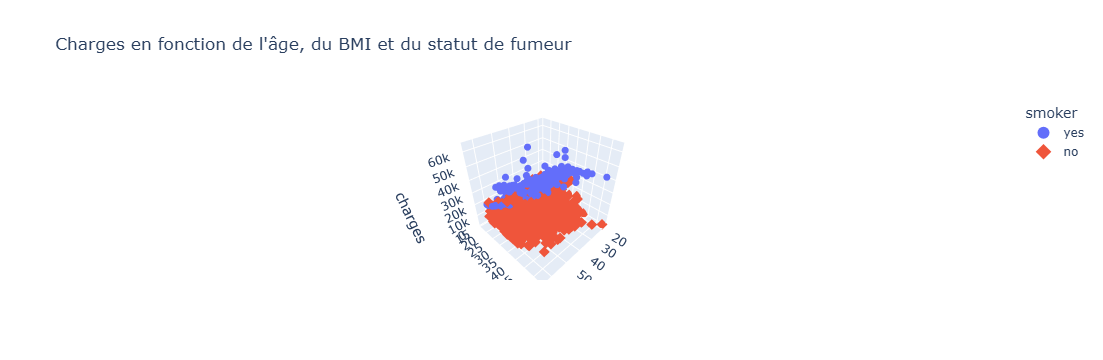

In [7]:
import plotly.express as px

df = data.copy()

fig = px.scatter_3d(
    df,
    x="age",
    y="bmi",
    z="charges",
    color="smoker",          # coloration par catégorie
    symbol="smoker",         # symboles différents
    opacity=1,
    title="Charges en fonction de l'âge, du BMI et du statut de fumeur",
    size="charges",
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=4))
fig.show()

Pour le groupe intermédiaire, il semble y avoir une relation entre BMI et les charges. Plus il est élevé, les charges semblent l'être mais c'est à inspecter.\
Il semble que la partie agée des fumeurs de la "catégorie du milieu" des charges ait aussi un bmi + elevée.
On observe qu'il y a plus de personnes jeunes qui ont un bmi élevé et ne fument pas.
Nous allons maintenant examiner les charges en fonction du BMI.

[]

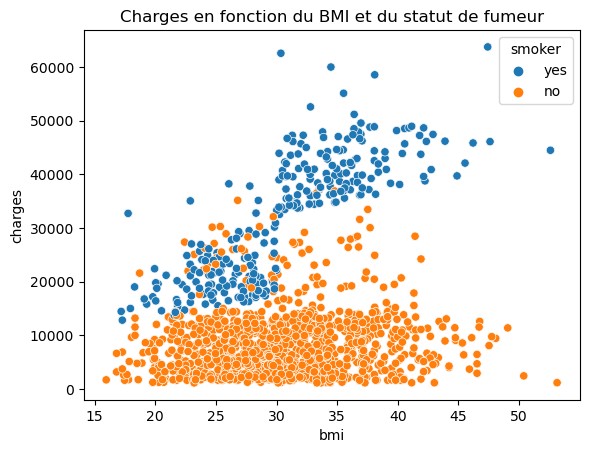

In [8]:
sns.scatterplot(data = data, y = "charges",x = "bmi",hue="smoker")
plt.title("Charges en fonction du BMI et du statut de fumeur")
plt.plot()

On peut très clairement voir que pour les fumeurs, les charges de santé augmente assez peu avec le BMI et reste à peu près constante mais que pour les fumeurs, \
plus le BMI est important, plus les charges de santé le seront. Cela peut indiquer un facteur de risque supplémentaire. 

In [9]:
#Relation entre les variables catégorielles
nom_var = ["sex","smoker","region"]
seuil_corr_nom = 0
for i,var in enumerate(nom_var):
    ct_tab = []
    cr_tab = []
    for j in range(i+1,len(nom_var)):
        #print("i :", i, " j :", j)
        ct_tab.append(pd.crosstab(index=data[nom_var[i]], columns=data[nom_var[j]]))
        cr_tab.append(stats.contingency.association(ct_tab[j-1-i],correction=False,method="cramer"))
        if(cr_tab[j-i-1] >= seuil_corr_nom):
            print("Coefficient de Cramér de", nom_var[i], "et", nom_var[j]," : ", cr_tab[j-i-1])


Coefficient de Cramér de sex et smoker  :  0.08232647745208163
Coefficient de Cramér de sex et region  :  0.024768087180991518
Coefficient de Cramér de smoker et region  :  0.07906136988750963


On observe pas de corrélations claires entre ces variables.

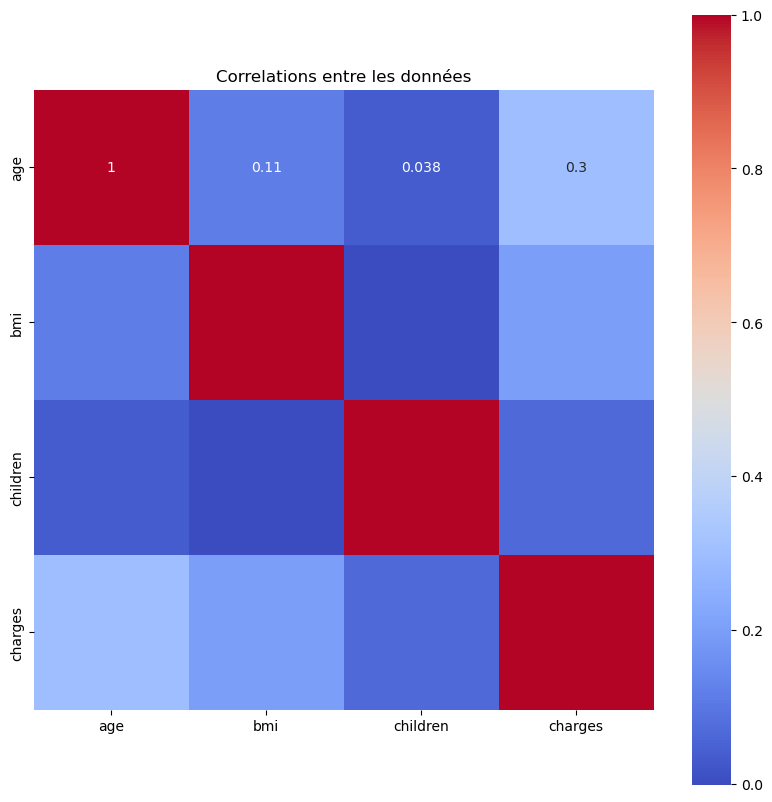

In [10]:
#Corrélations linéaires entre les variables numériques
X = data.select_dtypes("number")
X_corr = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, annot=True,cmap = 'coolwarm', square=True)
plt.title('Correlations entre les données')
plt.show()

# from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, pairwise_kernels, sigmoid_kernel
# X_corr_rbf1 = pairwise_kernels(X,metric="linear")
# print(pd.DataFrame(X_corr_rbf1).corr())

# plt.figure(figsize=(10,10))
# sns.heatmap(X_corr, annot=True,cmap = 'coolwarm', square=True)
# plt.title('Correlations entre les données')
# plt.show()

Il en est de même pour les variables numériques : la heatmap ne montre pas de corrélation linéaire supérieure à 0.3 (charges et age).

In [11]:
#Encoding
#Since each categorical variable (3 of the six explaining variables) have only 2 (for sex and smoker) or 4 values (for region), we can do a one hot encoding.
#It will generate only 6 columns resulting in 9 columns used in total to predict the charges (we drop the 3 categorical variables and replace them with their dummies).
cat_var = data.select_dtypes("object").columns

encoder = OneHotEncoder(drop = "if_binary",sparse_output=False)
output = encoder.fit_transform(data[cat_var])
df_output = pd.DataFrame(output, columns=["sex_male","smoker_yes","region_northeast","region_northwest","region_southeast","region_southwest"])
df_output.shape 
# print(data.head())
# print(df_output.head())

data_processed = data.copy()
data_processed.drop(["sex","smoker","region"], axis=1, inplace=True)
data_processed[["sex_male","smoker_yes","region_northeast","region_northwest","region_southeast","region_southwest"]] = df_output
data_processed.head()


age     bmi  children      charges  sex_male  smoker_yes  region_northeast  \
0   19  27.900         0  16884.92400       0.0         1.0               0.0   
1   18  33.770         1   1725.55230       1.0         0.0               0.0   
2   28  33.000         3   4449.46200       1.0         0.0               0.0   
3   33  22.705         0  21984.47061       1.0         0.0               0.0   
4   32  28.880         0   3866.85520       1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0

In [12]:
#Adding a constant columns 
data_processed["const"] = pd.Series(np.ones(shape=(2772,)))
cols = ['const'] + [col for col in data_processed.columns if col != 'const']
data_processed = data_processed[cols]
data_processed.head()

const  age     bmi  children      charges  sex_male  smoker_yes  \
0    1.0   19  27.900         0  16884.92400       0.0         1.0   
1    1.0   18  33.770         1   1725.55230       1.0         0.0   
2    1.0   28  33.000         3   4449.46200       1.0         0.0   
3    1.0   33  22.705         0  21984.47061       1.0         0.0   
4    1.0   32  28.880         0   3866.85520       1.0         0.0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0

Faire beaucoup d'analyse descriptive 


# Model implementation

## Linear Model

In [13]:
#First LinearRegression => full model
y = data_processed["charges"]
X = data_processed.drop("charges", axis=1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

results = sm.OLS(y_train,X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     844.2
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:39:03   Log-Likelihood:                -22432.
No. Observations:                2217   AIC:                         4.488e+04
Df Residuals:                    2208   BIC:                         4.493e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9682.7225    601.751  

On peut d'emblée voir que la variable sex (sex_male) n'est pas significative car sa p-value est de 0.8 soit bien plus que 0.05.

In [14]:
#Stepwise model selection : forward
y = data_processed["charges"]

col = data_processed.columns
col = col.drop("charges")
list_col = ["const"]
resumecustom = [[],[],[],[]]
for i,var in enumerate(col):
    if(i != 0):
        list_col.append(var) 
        
    # print("\nVariables used :")
    # print(list_col)
    X = data_processed[list_col]

    X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    results = sm.OLS(y_train,X_train).fit()
    # list_col_string = "const,"
    # for i in range(len(list_col)):
    #     list_col_string = list_col_string + list_col[i]+ ","

    resumecustom[0].append(list_col[-1])
    resumecustom[1].append(results.rsquared)
    resumecustom[2].append(results.f_pvalue)
    resumecustom[3].append(results.aic)

    print(results.summary())

df_results = pd.DataFrame(np.transpose(resumecustom), columns=["Column added","R2","F-stat","AIC"])
df_results.head(10)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Nov 2025   Prob (F-statistic):                nan
Time:                        18:39:04   Log-Likelihood:                -23985.
No. Observations:                2217   AIC:                         4.797e+04
Df Residuals:                    2216   BIC:                         4.798e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.337e+04    256.753     52.078      0.0

Column added                     R2                  F-stat  \
0             const  2.220446049250313e-16                     nan   
1               age    0.08027686460936745   3.349218986550146e-42   
2               bmi    0.10592076211931911   1.490194520644532e-54   
3          children     0.1091731416993943  3.4794943979037125e-55   
4          sex_male    0.11248180852041689   6.058539406614756e-56   
5        smoker_yes      0.752167007569981                     0.0   
6  region_northeast     0.7530769134164336                     0.0   
7  region_northwest     0.7536082681883229                     0.0   
8  region_southeast     0.7536150843902419                     0.0   
9  region_southwest     0.7536150843902419                     0.0   

                  AIC  
0   47972.47529546012  
1   47788.95098451045  
2   47728.25803611689  
3   47722.17858193749  
4   47715.92897615142  
5  44889.759902418074  
6   44883.60532434829  
7     44880.829412736  
8  44882.768080610236  
9  44882.768080610236

On peut clairement voir que le R2 bondit après l'ajout de la variable smoker au modèle et que bmi, âge, children et sex n'ont que très peu d'influence (comme prévu pour sex). \
Nous allons essayer un modèle avec seulement age, bmi, et smoker afin de coller aux visualisations faites précédemment.

In [15]:
y = data_processed["charges"]
X = data_processed.drop("charges", axis=1)
X = X[["const","age","bmi","smoker_yes"]]

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

results = sm.OLS(y_train,X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     2214.
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:39:04   Log-Likelihood:                -22448.
No. Observations:                2217   AIC:                         4.490e+04
Df Residuals:                    2213   BIC:                         4.493e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.115e+04    723.310    -15.415      0.0

Nous avons donc le modèle : charges = -1115 + 256 x age + 307 x bmi + 23856 x smoker_yes sur deux graphes différents.

[]

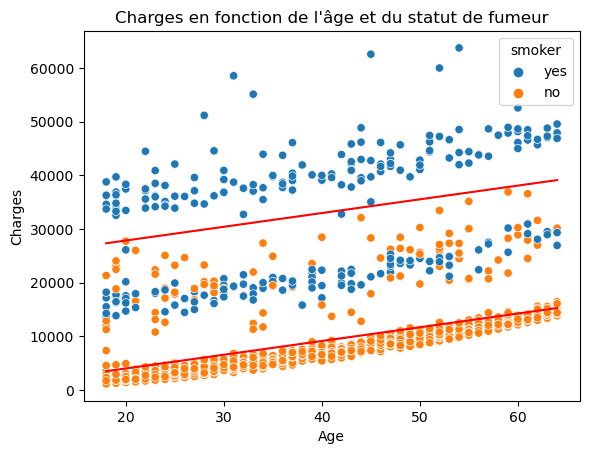

In [16]:
age_range = np.linspace(data_processed['age'].min(), data_processed['age'].max(), 200)
charges_pred_non_fumeur = -1115 + 256*age_range + 23856*0
charges_pred_fumeur = -1115 + 256*age_range + 23856*1

sns.scatterplot(data = data, y = "charges",x = "age",hue="smoker")
plt.title("Charges en fonction de l'âge et du statut de fumeur")
plt.plot(age_range, charges_pred_non_fumeur, color='red', label='Droite de régression sans fumeur')
plt.plot(age_range, charges_pred_fumeur, color='red', label='Droite de régression avec fumeur')

plt.xlabel("Age")
plt.ylabel("Charges")
plt.plot()

[]

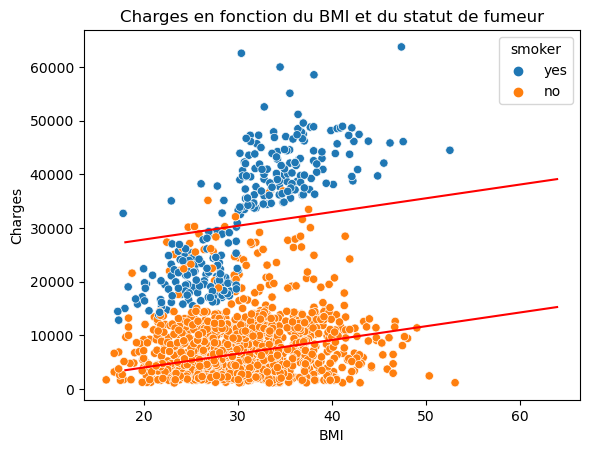

In [24]:
#A finir
age_range = np.linspace(data_processed['age'].min(), data_processed['age'].max(), 200)
charges_pred_non_fumeur = -1115 + 256*age_range + 23856*0
charges_pred_fumeur = -1115 + 256*age_range + 23856*1

sns.scatterplot(data = data, y = "charges",x = "bmi",hue="smoker")
plt.title("Charges en fonction du BMI et du statut de fumeur")
plt.plot(age_range, charges_pred_non_fumeur, color='red', label='Droite de régression sans fumeur')
plt.plot(age_range, charges_pred_fumeur, color='red', label='Droite de régression avec fumeur')

plt.xlabel("BMI")
plt.ylabel("Charges")
plt.plot()

In [18]:
##Stepwise model selection : backward
y = data_processed["charges"]
col = data_processed.columns
col = col.drop("charges")
list_col = col

for var in col:
    
    print("\nVariables used :")
    if(len(list_col.to_list())>0):
        print(list_col.to_list())
        X = data_processed[list_col]

        X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

        results = sm.OLS(y_train,X_train).fit()
        print(results.summary())

        list_col = list_col.drop(var) 
    else:
        print("Backward ended")


Variables used :
['const', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     844.2
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        18:39:06   Log-Likelihood:                -22432.
No. Observations:                2217   AIC:                         4.488e+04
Df Residuals:                    2208   BIC:                         4.493e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t 

## Gamma Model

Because no negative values

TESTS DE MODIFS SUR MODELES LINEAIRES

Text(0.5, 1.0, 'Distribution de log(charges)')

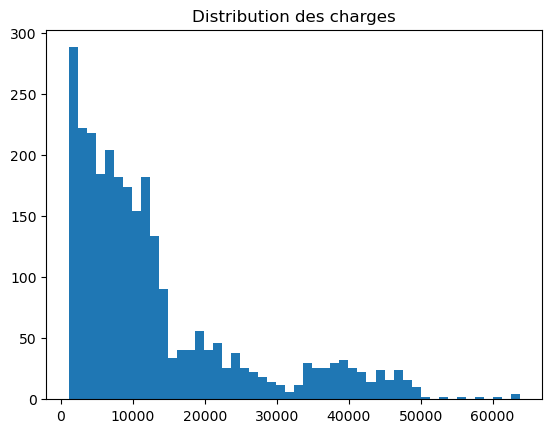

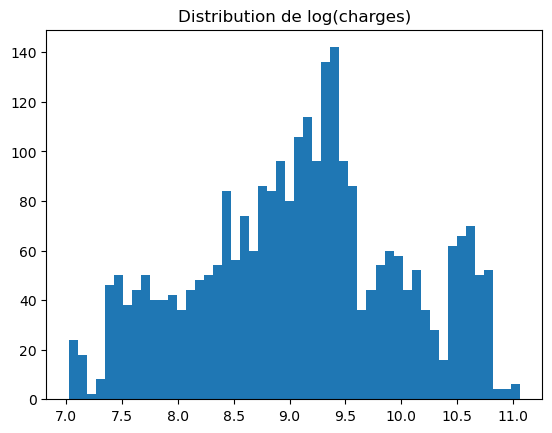

In [20]:
df["log_charges"] = np.log(df["charges"])

plt.figure()
plt.hist(df["charges"], bins=50)
plt.title("Distribution des charges")

plt.figure()
plt.hist(df["log_charges"], bins=50)
plt.title("Distribution de log(charges)")


On observe qu'il serait peut etre utile de faire une observation de log charges plutot que charges, et de retrouver les valeurs plus tard.

<Axes: xlabel='bmi_cat', ylabel='charges'>

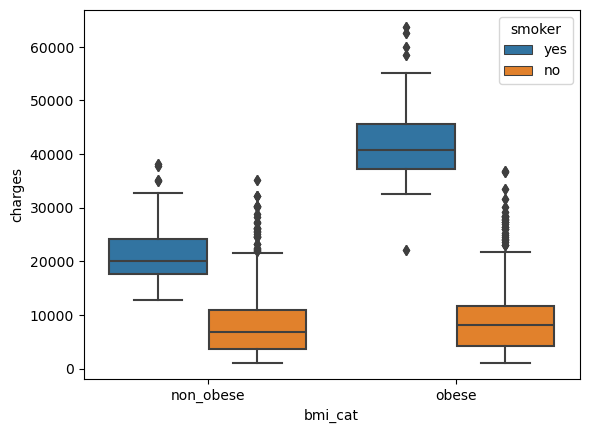

In [22]:
sns.boxplot(data=df, x="bmi_cat", y="charges", hue="smoker")


Les boxplots corroborent l'information que l'effet "obesité" est beaucoup plus fort chez les fumeurs que chez les non fumeurs.
Precisement, on observe quasi aucune différence entre les non fumeurs non obeses et les non fumeurs obeses
En revanche, le fait de fumer change grandement les charges, comme observé, et cet effet est accru par l'obesité.

In [25]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df["log_charges"] = np.log(df["charges"])

formula = "log_charges ~ age + smoker + bmi_cat + smoker:bmi_cat + children + sex + region"

glm_log = smf.glm(formula=formula,
                  data=df,
                  family=sm.families.Gaussian()).fit()

print(glm_log.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            log_charges   No. Observations:                 2772
Model:                            GLM   Df Residuals:                     2762
Model Family:                Gaussian   Df Model:                            9
Link Function:               Identity   Scale:                         0.18315
Method:                          IRLS   Log-Likelihood:                -1575.6
Date:                Fri, 28 Nov 2025   Deviance:                       505.86
Time:                        18:58:08   Pearson chi2:                     506.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9744
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   